In [2]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import os
import logging

In [3]:
## Setup chrome options
chrome_options = Options()
chrome_options.add_argument("--headless") # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")

# Silent download of drivers
logging.getLogger('WDM').setLevel(logging.NOTSET)
os.environ['WDM_LOG'] = 'False'

# Create service
webdriver_service = Service(ChromeDriverManager().install())

# Create driver
driver = webdriver.Chrome(service = webdriver_service, options = chrome_options)

# Go to the characters in books page
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

# # Click on Accept cookies
# time.sleep(3)
# driver.find_element(By.XPATH, '//div[text()="ACCEPT"]').click()

# Find books
book_categories = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')

books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, "url": book_url})

In [4]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [5]:
character_list = []

for book in books:
    # go to book page
    driver.get(book['url'])
    
    character_elems = driver.find_elements(by=By.CLASS_NAME, value = 'category-page__member-link')
    
    for elem in character_elems:
        character_list.append({'book': book['book_name'],'character': elem.text})

In [6]:
pd.DataFrame(character_list)

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1271,Category:Time of Contempt characters,Yanna of Murivel
1272,Category:Time of Contempt characters,Yarpen Zigrin
1273,Category:Time of Contempt characters,Yennefer of Vengerberg
1274,Category:Time of Contempt characters,Yiolenta Suarez


##### Number of character per book

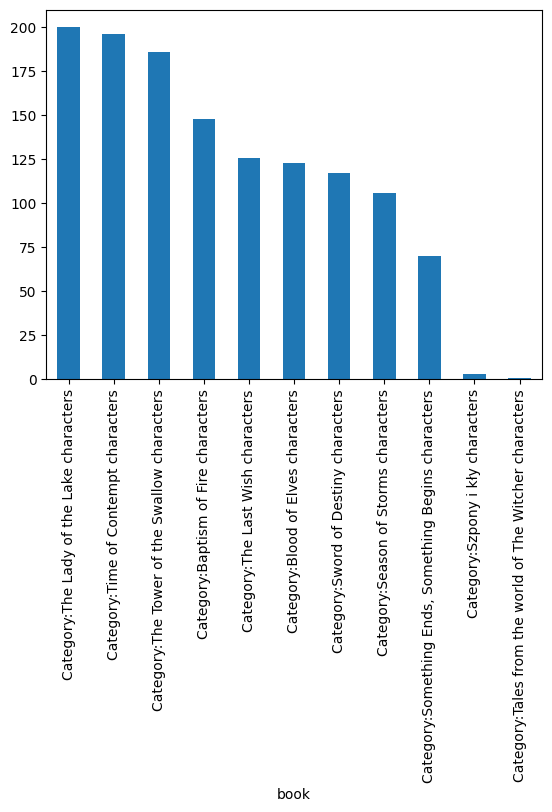

In [7]:
character_df = pd.DataFrame(character_list)

character_df['book'].value_counts().plot(kind="bar")
plt.show()

## Extracting Relationships

In [9]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [15]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     ---------------------------------------- 0.1/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 3.5 MB/s eta 0:00:04
     -- ------------------------------------- 0.9/12.8 MB 5.4 MB/s eta 0:00:03
     --- ------------------------------------ 1.3/12.8 MB 6.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.8/12.8 MB 6.6 MB/s eta 0:00:02
     ----- ---------------------------------- 1.9/12.8 MB 5.6 MB/s eta 0:00:02
     -------- ------------------------------- 2.7/12.8 MB 7.3 MB/s eta 0:00:02
     ---------- ----------------------------- 3.3/12.8 MB 7.9 MB/s eta 0:00:02
     ----------- ---------------------------- 3.6/12.8 MB 8.2 MB/s eta 0:00:02
     ------------- -------------------------- 4.4/12.8 MB 8.6 MB/s eta 0:00:01
     --------------- ------------------------ 5.0/12.8 MB 

In [16]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

Load Boooks

In [17]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [18]:
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [19]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [20]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

Load Character Names

In [21]:
# Read characters
character_df = pd.read_csv("./data/characters.csv")

In [22]:
# Remove brackets and text within brackets
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [23]:
pd.set_option('display.max_rows', None)
character_df

,book,character,character_firstname
0,Category:Baptism of Fire characters,Adalia,Adalia
1,Category:Baptism of Fire characters,Adela,Adela
2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,Category:Baptism of Fire characters,Aglaïs,Aglaïs
5,Category:Baptism of Fire characters,Albrich,Albrich
6,Category:Baptism of Fire characters,Amavet,Amavet
7,Category:Baptism of Fire characters,Angus Bri Cri,Angus
8,Category:Baptism of Fire characters,Anna Kameny,Anna
9,Category:Baptism of Fire characters,Anzelm Aubry,Anzelm


Get entity list per sentence

In [24]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [25]:
sent_entity_df.head(10)

,sentence,entities
0,"(﻿The, Limits, of, the, Possible, \n, I, \n, ""...",[]
1,"("", It, 's, been, an, hour, and, a, quarter, s...",[an hour and a quarter]
2,"(He, 's, done, for, .)",[]
3,"("", \n, The, townsfolk, ,, huddled, together, ...",[]
4,"(A, fat, man, dressed, in, a, yellow, smock, \...",[]
5,"("", We, have, to, wait, a, bit, longer, ,, "", ...",[]
6,"("", Why, wait, ?, "", snorted, pimply, ,, "", Th...",[]
7,"(Anyone, goes, down, there, ,, that, 's, the, ...",[]
8,"(Have, you, forgotten, how, many, \n, have, di...",[]
9,"(What, are, we, waiting, for, ?, "", \n, "", Thi...",[]


In [26]:
sent_entity_df.tail(10)

,sentence,entities
11317,"(Forever, !, Say, it, !, "", \n, "", Forever, ,,...","[Forever, Ciri, Geralt]"
11318,"(Like, they, predicted, ...)",[]
11319,"(I, 'm, your, destiny, ?)",[]
11320,"(Say, it, !)",[]
11321,"(I, 'm, your, destiny, ?)",[]
11322,"("", \n, Yurga, saw, astonishment, in, the, eye...",[Yurga]
11323,"(He, heard, Chrysididae, 's, discreet, sobs, a...",[]
11324,"(He, knew, that, he, would, not, understand, t...",[]
11325,"(With, good, reason, :, \n, "", You, 're, more,...",[]
11326,"(More, than, that, ., "")",[]


In [27]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [28]:
filter_entity(["Geralt", "Thu", "2"], character_df)

['Geralt']

In [29]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt of Rivia]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt of Rivia]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
140,"("", I, forgot, ,, "", Three, Jackdaws, winked, ...","[Three Jackdaws, Geralt]",[Geralt]
151,"(Geralt, loosened, his, belt, ,, removed, his,...",[Geralt],[Geralt]
157,"("", Do, the, girls, speak, the, common, langua...",[Geralt],[Geralt]
160,"(How, 's, your, soup, ,, Geralt, ?, "", \n, "", ...","[Geralt, Hmm]",[Geralt]
169,"(Yet, there, is, a, certain, principal, underl...",[Geralt],[Geralt]


In [30]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

C:\Users\vivek\AppData\Local\Temp\ipykernel_3480\1150129198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


In [31]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
...,...,...,...
11309,"(He, only, saw, black, -, gloved, hands, squee...",[Ciri],[Ciri]
11311,"(Oh, ,, Geralt, !)",[Geralt],[Geralt]
11316,"(Say, it, ,, Geralt, !)",[Geralt],[Geralt]
11317,"(Forever, !, Say, it, !, "", \n, "", Forever, ,,...","[Forever, Ciri, Geralt]","[Ciri, Geralt]"


Create Relationships

In [32]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [33]:
relationship_df = pd.DataFrame(relationships)

In [34]:
pd.set_option('display.max_rows', None)
relationship_df.head(10)

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Niedamir,Geralt
4,Niedamir,Geralt
5,Niedamir,Geralt
6,Geralt,Niedamir
7,Geralt,Niedamir
8,Niedamir,Geralt
9,Niedamir,Geralt


In [35]:
relationship_df.tail(10)

,source,target
3375,Geralt,Ciri
3376,Ciri,Geralt
3377,Geralt,Ciri
3378,Ciri,Geralt
3379,Geralt,Ciri
3380,Ciri,Geralt
3381,Geralt,Ciri
3382,Ciri,Geralt
3383,Ciri,Geralt
3384,Geralt,Yurga


In [36]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df.head(10)

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Geralt,Niedamir
4,Geralt,Niedamir
5,Geralt,Niedamir
6,Geralt,Niedamir
7,Geralt,Niedamir
8,Geralt,Niedamir
9,Geralt,Niedamir


In [37]:
relationship_df.tail(10)

,source,target
3375,Ciri,Geralt
3376,Ciri,Geralt
3377,Ciri,Geralt
3378,Ciri,Geralt
3379,Ciri,Geralt
3380,Ciri,Geralt
3381,Ciri,Geralt
3382,Ciri,Geralt
3383,Ciri,Geralt
3384,Geralt,Yurga


In [38]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [39]:
relationship_df.head(10)

,source,target,value
0,Geralt,Niedamir,52
1,Eyck,Geralt,51
2,Dorregaray,Geralt,30
3,Dorregaray,Yennefer,44
4,Geralt,Yarpen,24
5,Geralt,Gyllenstiern,32
6,Boholt,Niedamir,21
7,Boholt,Geralt,39
8,Geralt,Kennet,2
9,Boholt,Kennet,8


Graph Analysis

In [40]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

Graph Visualization - NetworkX

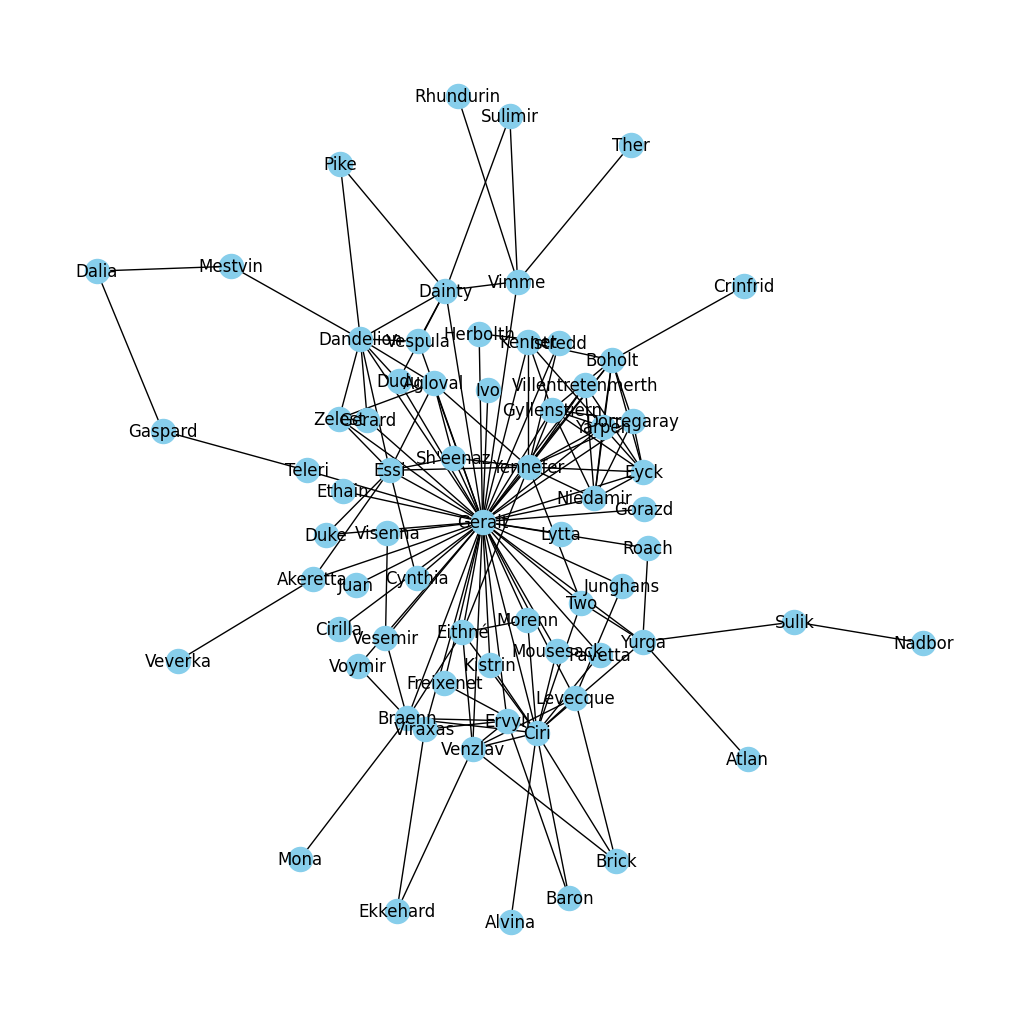

In [42]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Graph Visualization - PyVis

In [51]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources='in_line')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


In [52]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.7462686567164178,
 'Niedamir': 0.11940298507462686,
 'Eyck': 0.11940298507462686,
 'Dorregaray': 0.08955223880597014,
 'Yennefer': 0.22388059701492538,
 'Yarpen': 0.1044776119402985,
 'Gyllenstiern': 0.11940298507462686,
 'Boholt': 0.13432835820895522,
 'Kennet': 0.07462686567164178,
 'Crinfrid': 0.014925373134328358,
 'Villentretenmerth': 0.05970149253731343,
 'Istredd': 0.04477611940298507,
 'Herbolth': 0.029850746268656716,
 'Ivo': 0.014925373134328358,
 'Two': 0.05970149253731343,
 'Dandelion': 0.14925373134328357,
 'Pike': 0.029850746268656716,
 'Dainty': 0.1044776119402985,
 'Vespula': 0.04477611940298507,
 'Vimme': 0.07462686567164178,
 'Sulimir': 0.029850746268656716,
 'Ther': 0.014925373134328358,
 'Rhundurin': 0.014925373134328358,
 'Dudu': 0.04477611940298507,
 "Sh'eenaz": 0.05970149253731343,
 'Agloval': 0.08955223880597014,
 'Gaspard': 0.029850746268656716,
 'Teleri': 0.029850746268656716,
 'Dalia': 0.029850746268656716,
 'Mestvin': 0.029850746268656716,
 'Ess

<Axes: >

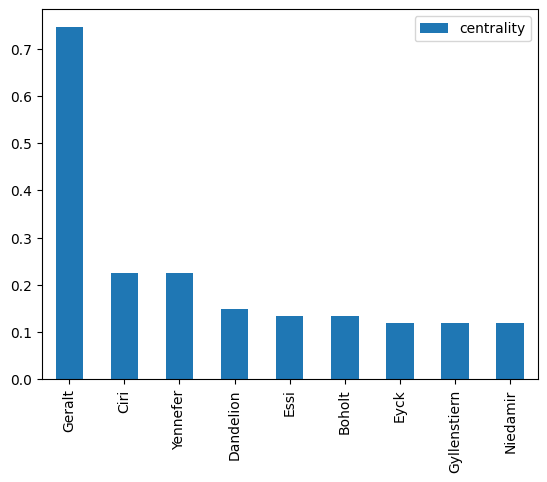

In [53]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

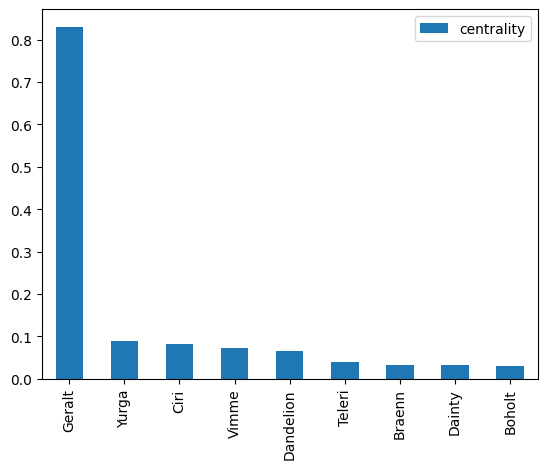

In [54]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

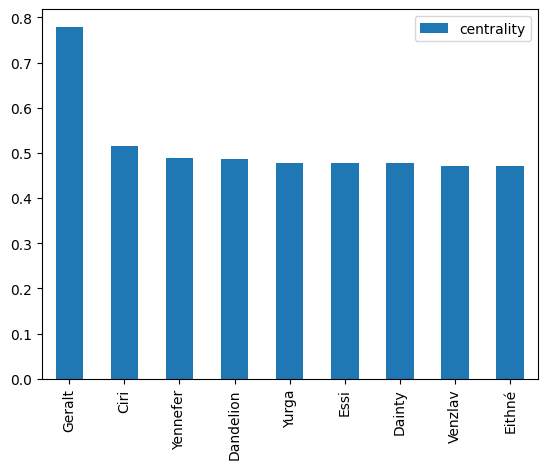

In [55]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [56]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

Community Detection

In [66]:
import community.community_louvain as cl

In [67]:
communities = cl.best_partition(G)

In [68]:
communities

{'Geralt': 0,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Boholt': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 0,
 'Herbolth': 0,
 'Ivo': 0,
 'Two': 2,
 'Dandelion': 4,
 'Pike': 4,
 'Dainty': 4,
 'Vespula': 4,
 'Vimme': 4,
 'Sulimir': 4,
 'Ther': 4,
 'Rhundurin': 4,
 'Dudu': 4,
 "Sh'eenaz": 0,
 'Agloval': 0,
 'Gaspard': 4,
 'Teleri': 4,
 'Dalia': 4,
 'Mestvin': 4,
 'Essi': 0,
 'Gerard': 4,
 'Zelest': 0,
 'Duke': 0,
 'Akeretta': 0,
 'Veverka': 0,
 'Ethain': 0,
 'Juan': 0,
 'Cynthia': 0,
 'Braenn': 3,
 'Ciri': 2,
 'Ervyll': 2,
 'Eithné': 2,
 'Voymir': 3,
 'Kistrin': 2,
 'Alvina': 2,
 'Vesemir': 3,
 'Cirilla': 0,
 'Freixenet': 2,
 'Venzlav': 2,
 'Ekkehard': 2,
 'Viraxas': 2,
 'Morenn': 2,
 'Mona': 3,
 'Pavetta': 2,
 'Baron': 2,
 'Junghans': 2,
 'Brick': 2,
 'Levecque': 2,
 'Mousesack': 2,
 'Yurga': 2,
 'Visenna': 3,
 'Atlan': 2,
 'Lytta': 0,
 'Gorazd': 0,
 'Roach': 2,
 'Nadbor': 2,
 'Sulik': 2}

In [69]:
nx.set_node_attributes(G, communities, 'group')

In [71]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white', cdn_resources="in_line")
com_net.from_nx(G)
com_net.show("witcher_communities.html")

witcher_communities.html


Evolution of characters importance

In [73]:
from lib.utils.functions import *

In [74]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('data') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [75]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)

C:\Users\vivek\AppData\Local\Temp\ipykernel_3480\2979113538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\vivek\AppData\Local\Temp\ipykernel_3480\2979113538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\vivek\AppData\Local\Tem

<Axes: >

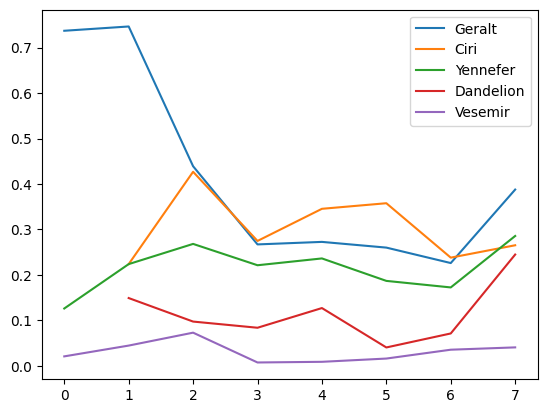

In [76]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()